Task 1:

The linear program maximising the expected return of the portfolio
when short selling is not allowed is
$$
\begin{align*}
\text{Maximize} \quad & \bar{r} = \sum_{i=1}^{5} \bar{r}_i w_i \\
\text{subject to} \quad &
\begin{cases}
\sum_{i=1}^{5} w_i =1\\
w_i \geq 0 \quad \forall i \in \{1,\ldots,5\}
\end{cases}
\end{align*}
$$
Let
$$
M = \max \{\bar{r}_1,\ldots,\bar{r}_5\} = \bar{r}_1.
$$
Since $\{w_i\}$ satisfies the condition that short selling is not allowed, namely they are all non negative, and sum of them are 1, one has
$$
\bar{r} = \sum_{i=1}^{5} \bar{r}_i w_i \le  M w_1 + Mw_2 + \ldots + M w_5 = M(w_1 + w_2 + \ldots + w_5) = M \times 1 = \bar{r}_1 = 13.0 \times 10^{-2}.
$$
The equality attains when $w^{\star} = (w^{\star}_1, \ldots, w^{\star}_5)^T = (1,0,0,0,0)^T$. Hence, the variance of the portfolio is
$$
\sigma = \sum_{i=1}^{5} \sum_{j=1}^{5} w^{\star}_i w^{\star}_j \sigma_{ij} = w^{\star}_1 w^{\star}_1 \sigma_{11} = 4.01 \times 10^{-2}.
$$



Task 2:

We consider the following problem:

$$
\begin{align*}
\text{Minimize} \quad & \sigma = \sum_{i=1}^{5} \sum_{j=1}^{5} w_i w_j \sigma_{ij} \\
\text{subject to} \quad &
\sum_{i=1}^{5} w_i =1
\end{align*}
$$

This problem can be reformulated as:
$$
\begin{align*}
\text{Minimize} \quad & \sigma = w^T \Sigma w \\
\text{subject to} \quad &
{\bf 1} \cdot  w = 1
\end{align*}
$$
where ${\bf 1} = (1,1,1,1,1)^T$.

The optimality conditions are expressed using the Lagrangian function:

$$
\mathcal{L}(w,\lambda) =  w^T \Sigma w - \lambda ({\bf 1} \cdot  w -1),
$$
Here, $\lambda$ represents a vector of Lagrange multipliers. The gradient of $\mathcal{L}$ is given by:
$$
\nabla \mathcal{L}(w,\lambda)
= (2  \Sigma \cdot w - \lambda {\bf 1},  - {\bf 1} \cdot  w + 1).
$$
First order KKT conditions for solution of the problem are
* $\nabla \mathcal{L}(w_\star,\lambda_\star) = 0$
* $\lambda_\star (\sum_{i=1}^5 w_{i \star} -1) = 0$.

Second order KKT condition for solution of the problem is
* $Z_+ (w_\star)^\top \nabla_{ww}^2 \mathcal{L}(w_\star,\lambda_\star) Z_+ (w_\star)$ is positive definite.

To solve Task 2, we will utilize the Karush-Kuhn-Tucker (KKT) method. Additionally, we provide two codes: one using the Sequential Quadratic Programming (SQP) algorithm and the other developed from scratch.

In [ ]:
import numpy as np

# Define the quadratic objective function coefficients
Q = np.array([[0.0401, -0.0119, 0.006, 0.0074, -0.0021],
                [-0.0119, 0.0112, 0.0021, -0.0054, 0.0055],
                [0.006, 0.0021, 0.0331, 0.0077, 0.0029],
                [0.0074, -0.0054, 0.0077, 0.0374, -0.0104],
                [-0.0021, 0.0055, 0.0029, -0.0104, 0.026]])  # Quadratic coefficients
c = np.array([0, 0, 0, 0, 0])  # Linear coefficients

# Define the coefficients of the linear inequality constraints (Ax = b)
A_eq = np.array([[1, 1, 1, 1, 1]])
b_eq = np.array([1])

def sqp_algorithm(Q, c, A_eq, b_eq, x0, learning_rate=0.01, max_iter=10000, tolerance=1e-8):
    x = x0
    for i in range(max_iter):
        # Calculate the objective function value and gradient
        f =  x.dot(Q).dot(x) + c.dot(x)
        gradient = 2* Q.dot(x) + c

        # Calculate the equality constraint violation
        equality_constraints = A_eq.dot(x) - b_eq

        # Compute the Lagrangian gradient
        lagrangian_gradient = gradient + A_eq.T.dot(equality_constraints)

        # Update x using gradient descent
        x -= learning_rate * lagrangian_gradient

        # Check convergence
        if np.linalg.norm(learning_rate * lagrangian_gradient) < tolerance:
            break

    return x, f

# Initial guess
initial_guess = np.array([0.2, 0.2, 0.2, 0.2, 0.2])

# Solve the quadratic programming problem with equality constraints using SQP algorithm
solution, optimal_value = sqp_algorithm(Q, c, A_eq, b_eq, initial_guess)

print("Optimal solution:")
print(solution)
print("Optimal value:")
print(optimal_value)

Optimal solution:
[ 0.21379274  0.51783747 -0.01325208  0.16025713  0.11459255]
Optimal value:
0.003183422969184173


In [ ]:
import numpy as np
Q =  np.array([[0.0401, -0.0119, 0.006, 0.0074, -0.0021],
              [-0.0119, 0.0112, 0.0021, -0.0054, 0.0055],
              [0.006, 0.0021, 0.0331, 0.0077, 0.0029],
              [0.0074, -0.0054, 0.0077, 0.0374, -0.0104],
              [-0.0021, 0.0055, 0.0029, -0.0104, 0.026]])  # Quadratic coefficients

row_to_add = np.array([1, 1, 1, 1, 1])
column_to_add = np.array([-1, -1, -1, -1, -1, 0])
Grad = np.vstack((Q, row_to_add))
Grad = np.column_stack((Grad, column_to_add))
# Solve linear system grad L(w, lambda) = 0
inverse_Grad = np.linalg.inv(Grad)
sol = inverse_Grad.dot(np.array([0, 0, 0, 0, 0, 1])) # sol[:-1] is w*_1,w*_2,...w*_5 and sol[5] is lambda*
# Check if Z^T Hessian(L) Z is positive definite
Z = np.array([[1, 1, 1, 1], [-1, 0, 0, 0], [0, -1, 0, 0 ], [0, 0, -1, 0], [0, 0, 0, -1]])
#print(np.linalg.cholesky(Z.T.dot(Q).dot(Z)))
try:
    np.linalg.cholesky(Z.T.dot(Q).dot(Z))
    print("Matrix Q is symmetric and positive definite.")
except np.linalg.LinAlgError:
    print("Matrix Q is symmetric but not positive definite.")
# Optimal solution
print("Optimal solution:")
print(sol[:-1])
print("Optimal value:")
print(sol[:-1].T.dot(Q).dot(sol[:-1]))

Matrix Q is symmetric and positive definite.
Optimal solution:
[ 0.22631538  0.5607838  -0.02230995  0.15001552  0.08519524]
Optimal value:
0.0031992646790940087


Task 3:


We consider the quadratic program that minimises the portfolio variance, subject to a precise value $\bar{r} = \rho$ of the expected rate of return for the portfolio in two cases: when short selling is and is not
allowed.


*   When short selling is allowed:
$$
\begin{align*}
\text{Minimize} \quad & \sigma = \sum_{i=1}^{5} \sum_{j=1}^{5} w_i w_j \sigma_{ij} \\
\text{subject to} \quad &
\sum_{i=1}^{5} w_i =1, \\
&  \sum_{i=1}^{5} \bar{r}_i w_i = \rho.
\end{align*}
$$
This problem can be reformulated as:
$$
\begin{align*}
\text{Minimize} \quad & \sigma = w^T \Sigma w \\
\text{subject to} \quad &
A\cdot  w = b
\end{align*}
$$
where
$$
A =
\begin{pmatrix}
  1 & 1 & 1 & 1 & 1 \\
  \bar{r}_1 & \bar{r}_2 & \bar{r}_3 & \bar{r}_4 & \bar{r}_5\\
\end{pmatrix}, \qquad \text{and} \qquad
b = (1, \rho)^T.
$$
*   When short selling is not allowed:
$$
\begin{align*}
\text{Minimize} \quad & \sigma = \sum_{i=1}^{5} \sum_{j=1}^{5} w_i w_j \sigma_{ij} \\
\text{subject to} \quad &
\sum_{i=1}^{5} w_i =1, \\
&  \sum_{i=1}^{5} \bar{r}_i w_i = \rho,\\
& w_1, w_2, w_3, w_4, w_5 \ge 0.
\end{align*}
$$

We will use library 'scipy.optimize', which provides an interface to solve convex optimization problems, including quadratic programming. This library is similarto 'quadprog' in MATLAB.

In the case where short selling is not allowed, when $\rho = 0.2$, we observe that the feasible set is empty. Specifically, we can demonstrate that:
$$
\sum_{i=1}^5 \bar{r}_i w_i \le max_j r_j = 0.13 < 0.2.
$$
Upon verifying with our code, the resulting outcome appears peculiar: [1.00000000e+00 1.92730024e-18 5.35058914e-16 2.75532948e-17 7.00731881e-17].


In [ ]:
import numpy as np
from scipy.optimize import minimize

# Define the objective function
def objective_function(x, Q):
    return  np.dot(x.T, np.dot(Q, x))

# Define the constraint function for equality: A * x = b
def equality_constraint(x):
    return np.dot(A, x) - b

# Define the inequality constraint: x >= 0
def inequality_constraint(x):
    return x

# Define the Q matrix (quadratic term)
Q = np.array([[0.0401, -0.0119, 0.006, 0.0074, -0.0021],
              [-0.0119, 0.0112, 0.0021, -0.0054, 0.0055],
              [0.006, 0.0021, 0.0331, 0.0077, 0.0029],
              [0.0074, -0.0054, 0.0077, 0.0374, -0.0104],
              [-0.0021, 0.0055, 0.0029, -0.0104, 0.026]])

# Define the A matrix and b vector for equality constraint: A * x = b
rho = 0.1
A = np.array([[1.0, 1.0, 1.0, 1.0, 1.0], [0.13, 0.044, 0.121, 0.071, 0.117]])
b = np.array([1, rho])

# Initial guess for x
x0 = np.array([0, 0.5, 0.1, 0.3, 0.1])

# Define constraints
eq_cons = {'type': 'eq', 'fun': equality_constraint}
ineq_cons = {'type': 'ineq', 'fun': inequality_constraint}
bounds = [(0, None)] * len(x0)
# Solve the quadratic programming problem
result_WithoutShortSelling = minimize(objective_function, x0, args=(Q,), constraints=[eq_cons], options={'disp': True})
result_WithShortSelling = minimize(objective_function, x0, args=(Q,), constraints=[eq_cons,ineq_cons], options={'disp': True})

# Extract the solution
x = result_WithoutShortSelling.x
print("Optimal solution without using short selling condition:")
print(result_WithoutShortSelling.x)
print("Optimal value without using short selling condition:")
print(result_WithoutShortSelling.fun)




print("Optimal solution using short selling condition:")
print(result_WithShortSelling.x)
print("Optimal solution using short selling condition:")
print(result_WithShortSelling.fun)




Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.005826171786570162
            Iterations: 8
            Function evaluations: 48
            Gradient evaluations: 8
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.005826171787879743
            Iterations: 8
            Function evaluations: 48
            Gradient evaluations: 8
Optimal solution without using short selling condition:
[0.25697762 0.21269129 0.12407288 0.11544644 0.29081177]
Optimal value without using short selling condition:
0.005826171786570162
Optimal solution using short selling condition:
[0.25697761 0.21269129 0.12407289 0.11544644 0.29081177]
Optimal solution using short selling condition:
0.005826171787879743


Task 4:

For a parameter $0 \le \alpha \le 1$, we consider the following quadratic program:
$$
\begin{align*}
\text{Minimize} \quad & \left(\alpha\sum_{i=1}^{5} \sum_{j=1}^{5} w_i w_j \sigma_{ij} - (1-\alpha) \sum_{i=1}^{5} \bar{r}_i w_i \right) \\
\text{subject to} \quad &
\sum_{i=1}^{5} w_i =1, \text{ and, when short selling is not allowed}\\
&  w_1, w_2, w_3, w_4, w_5 \ge 0.
\end{align*}
$$

* We observe that the case where $\alpha = 0$ presents an issue in Task 2:
$$
\begin{align*}
\text{Maximize} \quad &  \sum_{i=1}^{5} \bar{r}_i w_i  \\
\text{subject to} \quad &
\sum_{i=1}^{5} w_i =1, \text{ and, when short selling is not allowed}\\
&  w_1, w_2, w_3, w_4, w_5 \ge 0.
\end{align*}
$$
Conversely, the case where $\alpha = 1$ poses a problem in Task 1:
$$
\begin{align*}
\text{Minimize} \quad & \sum_{i=1}^{5} \sum_{j=1}^{5} w_i w_j \sigma_{ij}   \\
\text{subject to} \quad &
\sum_{i=1}^{5} w_i =1, \text{ and, when short selling is not allowed}\\
&  w_1, w_2, w_3, w_4, w_5 \ge 0.
\end{align*}
$$





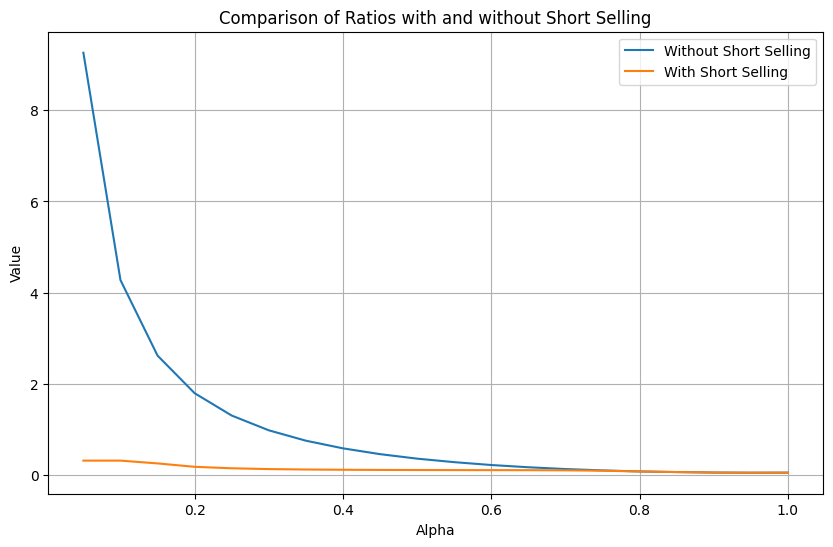

In [ ]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# Define the objective function
def objective_function(x, Q, r, alpha):
    return alpha * np.dot(x.T, np.dot(Q, x)) - (1 - alpha) * np.dot(x.T, r.T)

# Define the constraint function for equality: A * x = b
def equality_constraint(x):
    return np.dot(A, x) - b

# Define the inequality constraint: x >= 0
def inequality_constraint(x):
    return x

# Define the Q matrix (quadratic term) and vector r
Q = np.array([[0.0401, -0.0119, 0.006, 0.0074, -0.0021],
              [-0.0119, 0.0112, 0.0021, -0.0054, 0.0055],
              [0.006, 0.0021, 0.0331, 0.0077, 0.0029],
              [0.0074, -0.0054,  0.0077, 0.0374, -0.0104],
              [-0.0021, 0.0055, 0.0029, -0.0104, 0.026]])  # Quadratic coefficients

r = np.array([[0.13, 0.044, 0.121, 0.071, 0.117]])

# Define the A matrix and b vector for equality constraint: A * x = b
A = np.array([[1.0, 1.0, 1.0, 1.0, 1.0]])
b = np.array([1])

# Initial guess for x
x0 = np.array([0.5, 0, 0.1, 0.3, 0.1])

# Define constraints
eq_cons = {'type': 'eq', 'fun': equality_constraint}
ineq_cons = {'type': 'ineq', 'fun': inequality_constraint}

# Loop through different alpha values and store results for both cases
alphas = np.arange(0.05, 1.05, 0.05)  # Generate alpha values
results_Qx_over_R_without_ss = []
results_Qx_over_R_with_ss = []

for alpha in alphas:
    # Solve the quadratic programming problem without short selling
    result_WithoutShortSelling = minimize(objective_function, x0, args=(Q, r, alpha), constraints=[eq_cons], options={'disp': False})
    x_optimal = result_WithoutShortSelling.x
    Qx_over_R_without_ss = np.dot(x_optimal.T, np.dot(Q, x_optimal)) / np.dot(x_optimal.T, r.T)
    results_Qx_over_R_without_ss.append(Qx_over_R_without_ss)

    # Solve the quadratic programming problem with short selling
    result_WithShortSelling = minimize(objective_function, x0, args=(Q, r, alpha), constraints=[eq_cons, ineq_cons], options={'disp': False})
    x_optimal_ss = result_WithShortSelling.x
    Qx_over_R_with_ss = np.dot(x_optimal_ss.T, np.dot(Q, x_optimal_ss)) / np.dot(x_optimal_ss.T, r.T)
    results_Qx_over_R_with_ss.append(Qx_over_R_with_ss)

# Plotting both scenarios in the same figure
plt.figure(figsize=(10, 6))
plt.plot(alphas, results_Qx_over_R_without_ss, label='Without Short Selling')
plt.plot(alphas, results_Qx_over_R_with_ss, label='With Short Selling')
plt.xlabel('Alpha')
plt.ylabel('Value')
plt.title('Comparison of Ratios with and without Short Selling')
plt.legend()
plt.grid(True)
plt.show()




Let $m_{0,\alpha}$ and $m_{1,\alpha}$ are optimal values of the above problems without and with short selling condition, respectively. Observing the figure above, we note:
* $m_{0,\alpha} > m_{1,\alpha}$ for all $\alpha \in [0,1]$, and
* $\lim_{\alpha \rightarrow \infty} (m_{0,\alpha} - m_{1,\alpha}) = 0$.

The first point can be explained by the feasible set in the case without short selling condition is contained in the feasible set in the case with short selling condition while both share the same objective function.
The second observation can be explained by considering that as $\alpha$ approaches 1, the two problems converge towards the convex problems:
$$
\begin{align*}
\text{Minimize} \quad & \sum_{i=1}^{5} \sum_{j=1}^{5} w_i w_j \sigma_{ij}   \\
\text{subject to} \quad &
\sum_{i=1}^{5} w_i =1, \text{ and, when short selling is not allowed}\\
&  w_1, w_2, w_3, w_4, w_5 \ge 0.
\end{align*}
$$
